In [230]:
#importar librerias para limpieza de data
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [214]:
#Generar la ruta a el archivo CSV
FILE_NAME = "Forbes 2000 2022.csv"
PATH_TO_DATA_SET = "Data_set"

cdw = os.getcwd()
file_path = os.path.join(cdw, PATH_TO_DATA_SET, FILE_NAME)


In [215]:
#importar el archivo CSV, limpiar la col vacia y renombrar las columnas
forbes22 = pd.read_csv(file_path,encoding= 'UTF_8',sep=';')
forbes22 = forbes22.drop("Unnamed: 7",axis=1)
forbes22.columns = ['Rank', 'Company Name', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value']

In [216]:
#comprobación de los tipos de datos, veridicación de NAN y  '-'
forbes22.info()
forbes22.isna().any()
forbes22.isin(['-']).any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Company Name  2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profits       2000 non-null   object
 5   Assets        2000 non-null   object
 6   Market_Value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


Rank            False
Company Name    False
Country         False
Sales           False
Profits         False
Assets          False
Market_Value    False
dtype: bool

In [217]:
#limpieza de las columnas numericas y transformacion a tipo float

numeric_cols =['Sales','Profits','Assets', 'Market_Value']
forbes22[numeric_cols]  = forbes22[numeric_cols].replace('[^0-9]', '', regex=True).astype(float)
#verificacion de cambio
forbes22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Company Name  2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         2000 non-null   float64
 4   Profits       2000 non-null   float64
 5   Assets        2000 non-null   float64
 6   Market_Value  2000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


In [218]:
#calculos numericos con loa data limpia
forbes22['Sales'].count(), forbes22['Sales'].mean(), forbes22['Sales'].std(), forbes22['Sales'].var() 


(2000, 23876.035, 40943.9022916259, 1676403134.8662083)

In [219]:
#comprobra de la cantidad de valores vacios
forbes22.isna().sum()

Rank            0
Company Name    0
Country         0
Sales           0
Profits         0
Assets          0
Market_Value    0
dtype: int64

In [220]:
print(np.percentile(forbes22['Profits'],[25,50,75]))

forbes22['Profits'].quantile([0.25,0.5,0.75])

[ 653. 1120. 2390.]


0.25     653.0
0.50    1120.0
0.75    2390.0
Name: Profits, dtype: float64

In [221]:
# Valorar el 1% de las empresas con mas ganancias en el mundo /percentil 99

p99p = np.percentile(forbes22['Profits'],99)
p99p

23635.099999999995

In [222]:
#definimos algunos nombres de paises de sur america, para filtrarlos del data set
suda = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela']
f_suda = forbes22[forbes22['Country'].isin(suda)]

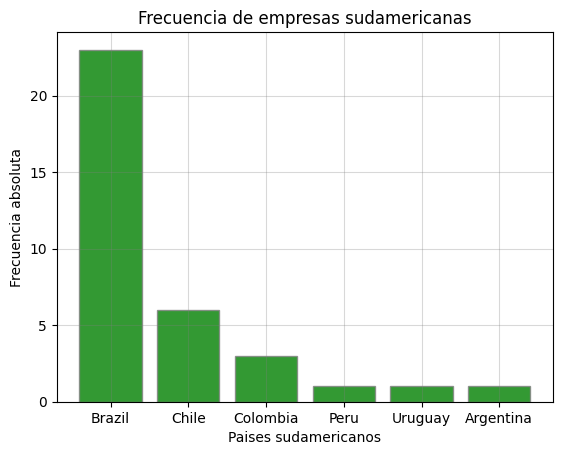

In [223]:
# Bar plot
table_suda=f_suda['Country'].value_counts()
table_suda

plt.bar(table_suda.index,table_suda.values, color = 'green', alpha = 0.8, edgecolor = 'gray') #Crea el gráfico de barras
plt.title('Frecuencia de empresas sudamericanas')
plt.xlabel('Paises sudamericanos')
plt.ylabel('Frecuencia absoluta')
plt.grid(color = 'gray',alpha = 0.3, linestyle = 'solid')

plt.show() #Imprime el gráfico

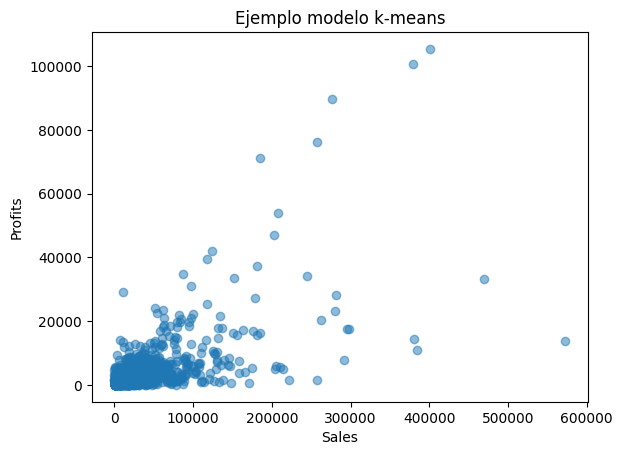

In [227]:
#modelo K-means Sales vs Profits
plt.title('Ejemplo modelo k-means')
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.scatter(forbes22['Sales'], forbes22['Profits'] , alpha=0.5)
plt.show()

In [241]:
#creacion del modelo kmeans con dos clusters
kmeans_model = KMeans(n_clusters= 2, init='k-means++',random_state=0)

In [242]:
#se asigna el resultado de aplicar el metrodo fit_predict sobre las ventas y ganancias
y = kmeans_model.fit_predict(forbes22[['Sales', 'Profits']])

c:\Users\sllow\Desktop\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [243]:
#muestra cuantas empresas se encuentran en cada cluster
pd.Series(y).value_counts()

0    1922
1      78
Name: count, dtype: int64

In [244]:
#se obtienen los centroides de cada uno de los clusters representado valores medio de ventas y ganancias
kmeans_model.cluster_centers_

array([[ 17434.25078044,   2062.1264308 ],
       [182608.20512821,  17859.96153846]])

In [245]:
#se agerega una nueva columna de a el DF con el contenido de cluster
df = pd.DataFrame(forbes22)
df['cluster'] = y
df

,Rank,Company Name,Country,Sales,Profits,Assets,Market_Value,cluster
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,1
1,2,ICBC,China,208130.0,54030.0,5518510.0,214430.0,1
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0,1
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,1
4,5,China Construction Bank,China,202070.0,46890.0,4746950.0,181320.0,1
...,...,...,...,...,...,...,...,...
1995,1996,Shenzhen Feima International Supply Chain,China,37.0,1410.0,166.0,1140.0,0
1996,1997,NMDC,India,3520.0,1410.0,5710.0,6400.0,0
1997,1998,Sichuan Changhong Electric,China,15720.0,53.0,12110.0,1960.0,0
1998,1999,Satellite Chemical,China,4410.0,931.0,7640.0,9520.0,0
